Group 21

Name: Payal Manishbhai Dhandhukiya, Darshan Dodamani, Jahnavi Janapareddy

# Assignment 4
## Filtering in Frequency Domain and Fourier Descriptors

### Task 1 – Filtering in Frequency Domain

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import math
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib.colors import LogNorm

a) Read the input image taskA.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.

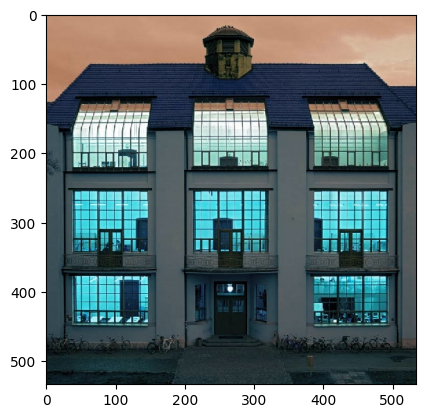

In [2]:
taskA_image = cv.imread("taskA.png")
plt.imshow(taskA_image)
plt.show()

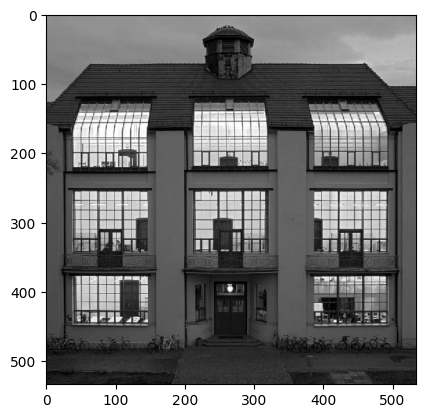

In [3]:
# Load the image in grayscale
image = cv.imread("taskA.png", cv.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python) given
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
cv.imwrite('Gray.png',image)
plt.show()

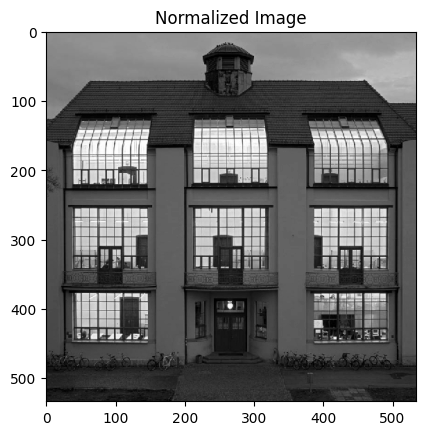

In [4]:
normalized_image = cv.imread("taskA.png", cv.IMREAD_GRAYSCALE)
cv.imwrite('normalized_image_taskA.png', normalized_image)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.show()


Add Gaussian noise to the image (imnoise, parameters e.g. μ = 0, (sigma)^2 = 0.01) and plot the result.

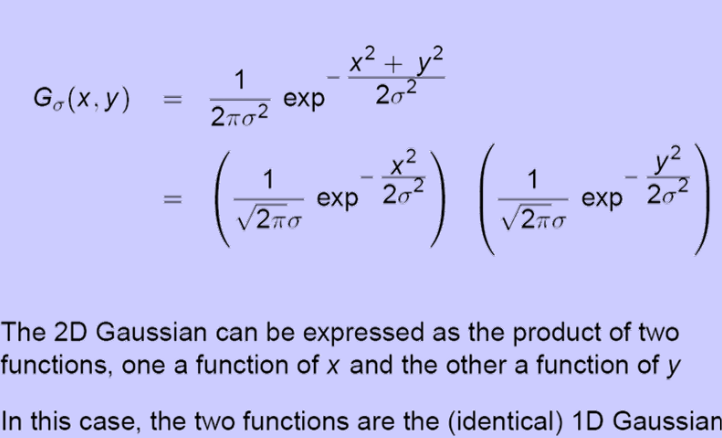

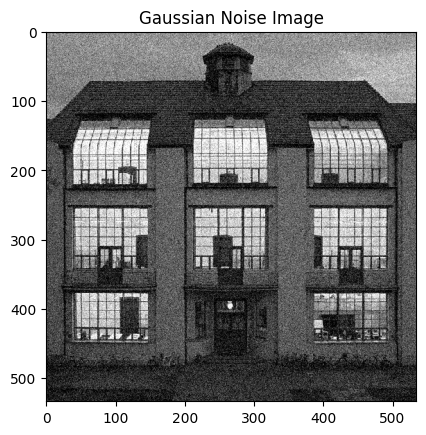

In [5]:
normalized_image = cv.imread("taskA.png", cv.IMREAD_GRAYSCALE) / 255.0
x,y = normalized_image.shape
mean = 0                    #μ = 0
variance = 0.01             #(sigma)^2 = 0.01
noise = np.random.normal(mean, variance **0.5, size=(x,y))
gaussian_noise_image = normalized_image + noise
gaussian_noise_image = np.clip(gaussian_noise_image, 0, 1)                          # Clip the values to ensure they are within the range [0, 1]
plt.imshow(gaussian_noise_image, cmap = 'gray')
plt.title('Gaussian Noise Image')
cv.imwrite('gaussian_noise_image_taskA.png', (gaussian_noise_image * 255).astype(np.uint8))
plt.show()

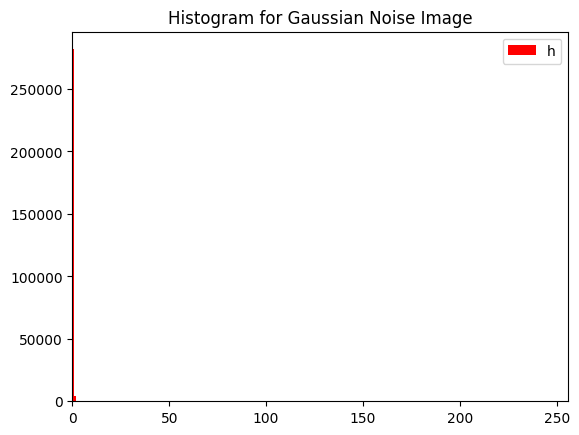

In [6]:
gaussian_noise_image.shape
hist, bins = np.histogram(gaussian_noise_image.flatten(), 256, [0,256])
plt.hist(gaussian_noise_image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.title('Histogram for Gaussian Noise Image')
plt.legend(('histogram'), loc = 'upper right')
plt.show()

c) Filter the noisy image with a self-computed 2D Gaussian filter in the frequency-domain (fft2, ifft2). Which sigma is suitable to remove the noise? Plot the result.

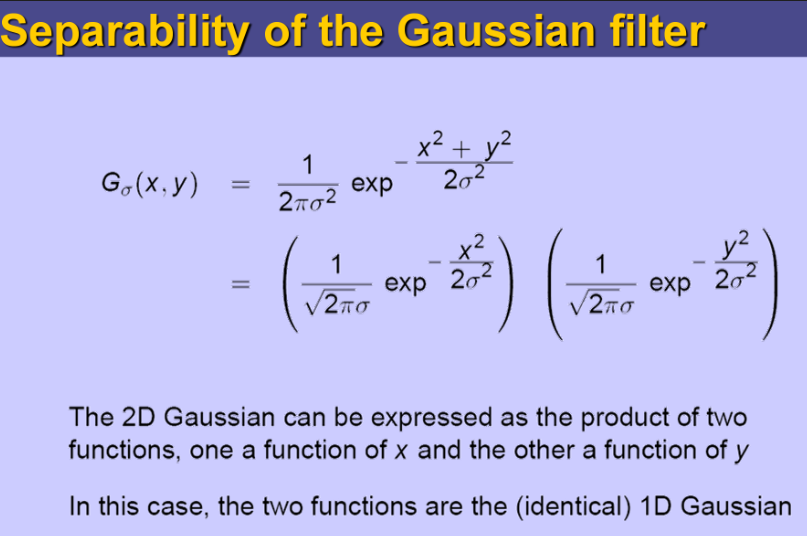

##### Reference: https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Gaussian%20Filtering_1up.pdf

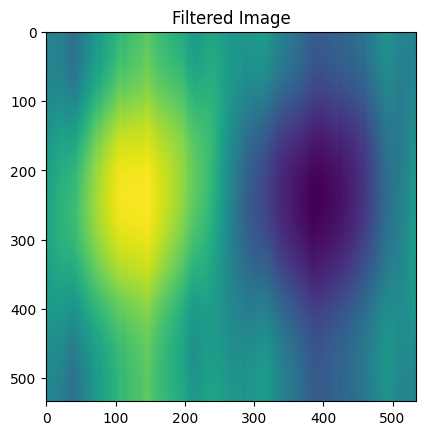

In [7]:
#define sigma value and gaussian filter and display image agter gaussian filter
sigma = 0.5  #Here to find the suitable sigma value, I have tried different values.

# Referring to Assignment 2 Task 1(Gadient of gaussian filtering)
x, y = np.meshgrid(np.linspace(-1, 1, gaussian_noise_image.shape[1]), np.linspace(-1, 1, gaussian_noise_image.shape[0]))
a = -(x / (2 * math.pi * sigma ** 4))
b = -((x ** 2 + y ** 2) / (2 * sigma ** 2))
c = np.exp(b)
gaussian_filter = np.round(a * c, 4)
# gaussian_filter = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

noisy_image_freq = fft2(gaussian_noise_image)                                    # Perform the Fourier transform on the noisy image
gaussian_filter_freq = fft2(gaussian_filter, s=gaussian_noise_image.shape)       # Perform the Fourier transform on the Gaussian filter
filtered_image_freq = noisy_image_freq * gaussian_filter_freq                    # Multiply the Fourier transformed noisy image with the Fourier transformed Gaussian filter
filtered_image = np.real(ifft2(filtered_image_freq))                             # Perform the inverse Fourier transform on the multiplied result

# Plot the filtered image
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.show()

The suitable sigma value was very hard for me to find. Although I managed to find and concluded with 0.5 - 3 

d) Plot the logarithmically centered spectra of the noisy image, the (padded) Gaussian filter, and the filtered image (imagesc, log, abs and fftshift).

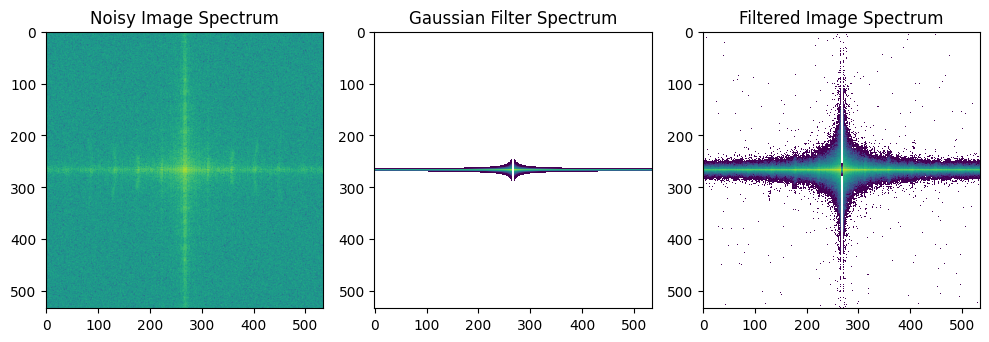

In [8]:
# (imagesc, log, abs and fftshift).
noisy_image_spectrum = np.abs(fftshift(noisy_image_freq))
gaussian_filter_spectrum = np.abs(fftshift(gaussian_filter_freq))
filtered_image_spectrum = np.abs(fftshift(filtered_image_freq))


plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(np.log(noisy_image_spectrum), norm=LogNorm(vmin=1))
plt.title('Noisy Image Spectrum')

plt.subplot(132)
plt.imshow(np.log(gaussian_filter_spectrum), norm=LogNorm(vmin=1))
plt.title('Gaussian Filter Spectrum')

plt.subplot(133)
plt.imshow(np.log(filtered_image_spectrum), norm=LogNorm(vmin=1))
plt.title('Filtered Image Spectrum')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Filtered Image')

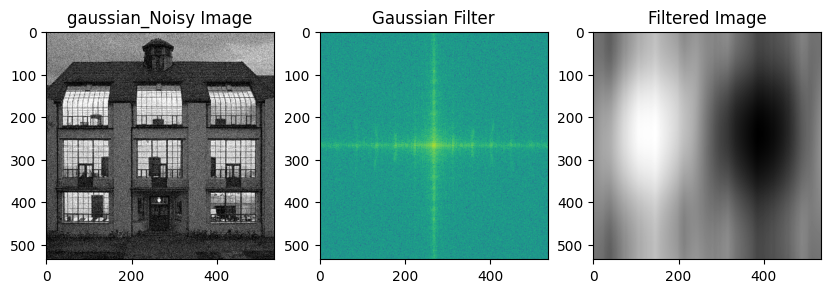

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('gaussian_Noisy Image')

plt.subplot(132)
plt.imshow(np.log(noisy_image_spectrum), norm=LogNorm(vmin=1))
plt.title('Gaussian Filter')

#iameg after gaussian noise in removed
plt.subplot(133)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

### Task 2 – Fourier Descriptors for Shape Recognition

a) Read the image trainB.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import math
from scipy.fft import fft
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from matplotlib.colors import LogNorm

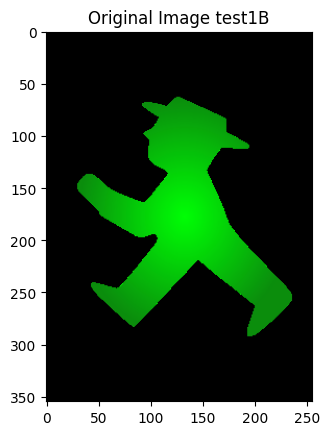

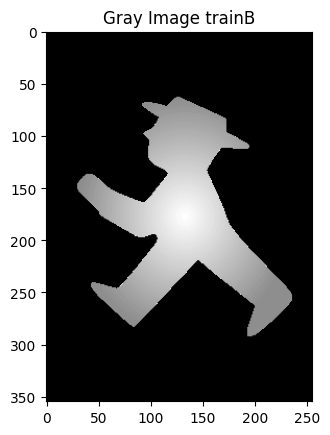

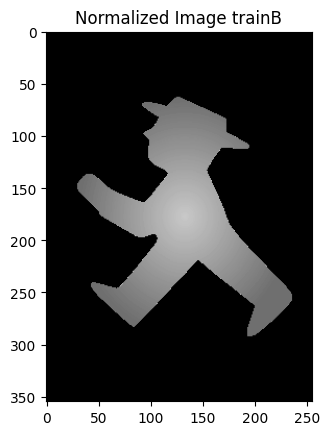

In [11]:
#Read the image trainB.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.
trainB_image = cv.imread("trainB.png")
plt.imshow(trainB_image)
plt.title('Original Image test1B')
plt.show()

# Load the image in grayscale
image = cv.imread("trainB.png", cv.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python) given
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
plt.title('Gray Image trainB')
cv.imwrite('Gray_trainB.png',image)
plt.show()

normalized_image = image.astype(np.float64) / 255.0

plt.imshow(normalized_image, cmap='gray', vmin=0, vmax=1)
plt.title('Normalized Image trainB')
plt.show()

b) Derive a binary mask (data type logical) of the image, where “1” represents the object of interest and “0” represents background (graythresh and im2bw).

Reference: https://de.mathworks.com/help/images/ref/imfill.html

[For Thresholding Technique]
https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

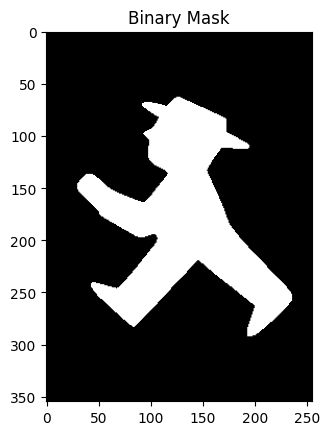

In [12]:
# Derive a binary mask (data type logical) of the image, where “1” represents the object of interest and “0” represents background (graythresh and im2bw).
normalized_image_8bit = (normalized_image * 255).astype(np.uint8)
threshold_value, binary_mask = cv.threshold(normalized_image_8bit, 0, 1, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary_mask = binary_mask.astype(bool)

plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.show()

c) Build a Fourier-descriptor Df based on the binary mask.

    i) Extract the boundaries of the binary mask (bwboundaries).

    ii) Use n = 24 elements for the descriptor.
    
    iii) Ensure its invariance to translation, orientation and scale.

Reference: https://de.mathworks.com/matlabcentral/answers/274061-how-to-get-the-inner-and-outer-outlines-of-a-boundary-in-an-image

For contours I refered: https://www.geeksforgeeks.org/python-opencv-find-center-of-contour/

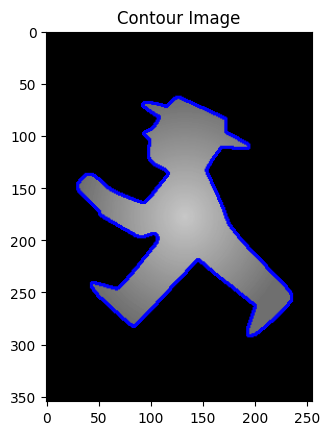

In [13]:
# as bwboundaries in Matlab in python after my research over Internet I found that cv2.findContours() is the equivalent function in python.
contours = cv.findContours(binary_mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

# Draw the contours on the original image
contour_image = cv.drawContours(img.copy(), contours, -1, (0, 0, 255), 2)

plt.imshow(contour_image)
plt.title('Contour Image')
plt.show()


ii) Use n = 24 elements for the descriptor.

Useful Material 
Reference: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

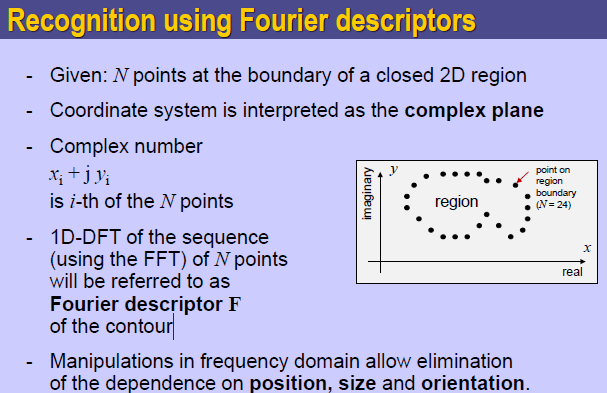

For centroid I refered: https://learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

In [14]:
boundary = contours[0]
boundary_points = boundary.squeeze()                        #Extract the boundary points from the contour
centroid = np.mean(boundary_points, axis=0)
centroid = centroid.astype(int)                             # Convert the centroid to integer coordinates
shifted_boundary_points = boundary_points - centroid        #Shift boundary points with respect to the centroid

n= 24
resample_points =[]
boundary_length = cv.arcLength(boundary, True)              # Calculate the length of the boundary
step_size = boundary_length / n                             # Calculate the step size

for i in range(n):
    position = i * step_size
    index = int(position) if int(position) < boundary_points.shape[0] else boundary_points.shape[0] - 1
    resample_points.append(shifted_boundary_points[index])

resample_points = np.array(resample_points)

# plt.figure(figsize=(10, 4))
# plt.subplot(121)
# plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'r')
# plt.plot(centroid[0], centroid[1], 'bo')
# plt.title('Original Boundary')

# plt.subplot(122)
# plt.plot(resample_points[:, 0], resample_points[:, 1], 'r')
# plt.plot(0, 0, 'bo')
# plt.title('Resampled Boundary')

# plt.show()


 after shifting the boundary points with respect to the centroid (translation invariance), I normalize the points to ensure scale invariance. Then, computed the angles of the normalized points and sort them. 
 Next, resampled the sorted points to a fixed number of points (n) to ensure scale invariance. Atlast computed the Fourier descriptor and normalize it for scale invariance as before

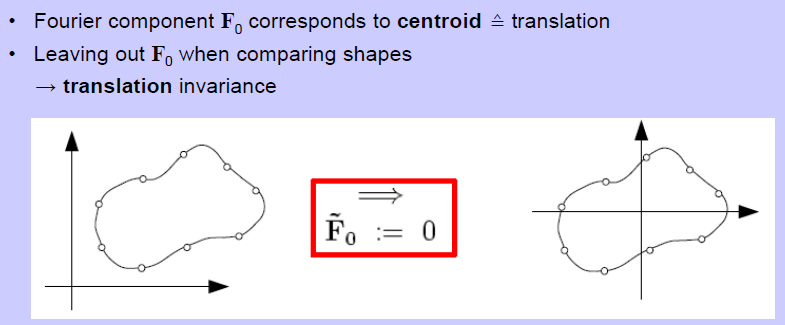

iii) Ensure its invariance to translation, orientation and scale.

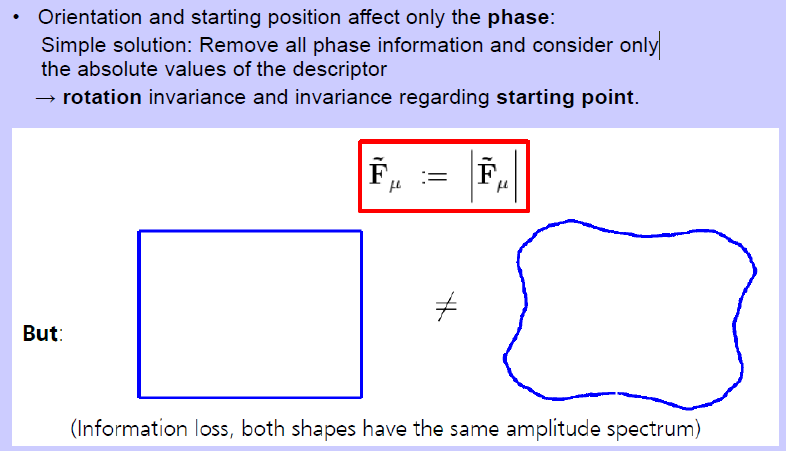

In [15]:
angle = np.arctan2(resample_points[0, 1], resample_points[0, 0])  # Calculate the angle of each point                                        
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])  # Create the rotation matrix
rotated_points = np.dot(rotation_matrix, resample_points.T).T    # Rotate the points

# # Plotting the rotated points
# plt.plot(rotated_points[:, 0], rotated_points[:, 1], 'o-')
# plt.title('Rotated Points')
# plt.show()

The DFT is the sampled Fourier Transform and therefore does not contain all frequencies forming an image, but only a set of samples which is large enough to fully describe the spatial domain image. The number of frequencies corresponds to the number of pixels in the spatial domain image, i.e. the image in the spatial and Fourier domain are of the same size.

Referance: https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm

In [16]:
#Fourier-descriptor Df based on the binary mask
Df = fft(rotated_points[:, 0] + 1j * rotated_points[:, 1])

fourier_descriptor = Df[:n]
normalized_descriptor_trainB = fourier_descriptor / np.abs(fourier_descriptor[0])

# # Plotting the Fourier descriptor for testing
# plt.plot(np.real(normalized_descriptor), np.imag(normalized_descriptor), "o-")
# plt.xlabel("Real")
# plt.ylabel("Imaginary")
# plt.title("Fourier Descriptor")

d) Apply steps a) to c) on the images test1B.jpg, test2B.jpg, and test3B.jpg in order to identify all potential object boundaries in the images. Note that more than one boundary might be identified by bwboundaries.

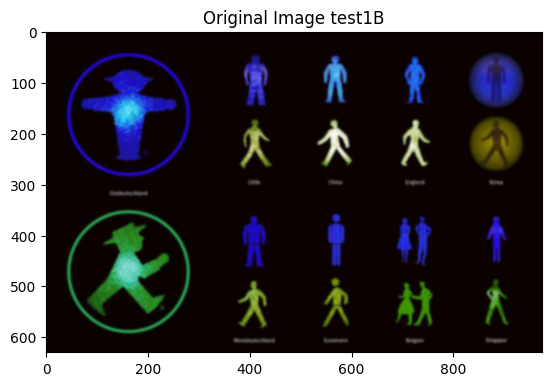

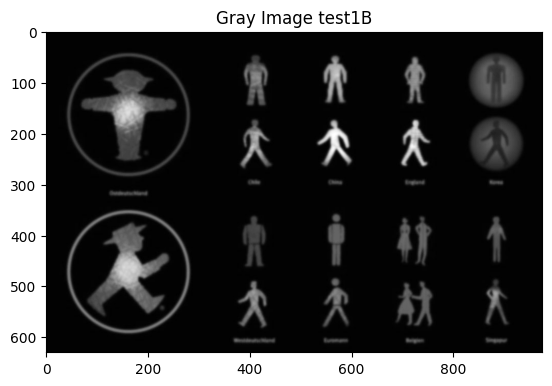

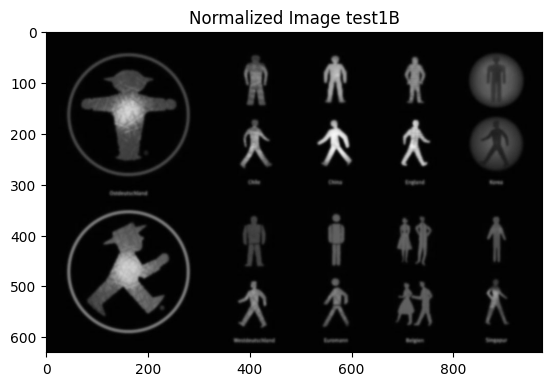

In [17]:
#for image test1B.jpg
#apply a) the same steps as for trainB.png, and b) the same steps as for trainB.png, but with n = 24
#Read the image trainB.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.
test1B_image = cv.imread("test1B.jpg")
plt.imshow(test1B_image)
plt.title('Original Image test1B')
plt.show()

# Load the image in grayscale
test1B_image = cv.imread("test1B.jpg", cv.IMREAD_GRAYSCALE)
test1B_img = cv.cvtColor(test1B_image, cv.COLOR_BGR2RGB)
plt.imshow(test1B_image, cmap="gray")
plt.title('Gray Image test1B')
cv.imwrite('Gray_test1B.png',test1B_image)
plt.show()

normalized_test1B_image = test1B_image.astype(np.float64) / 255.0

plt.imshow(normalized_test1B_image, cmap='gray', vmin=0, vmax=1)
plt.title('Normalized Image test1B')
plt.show()

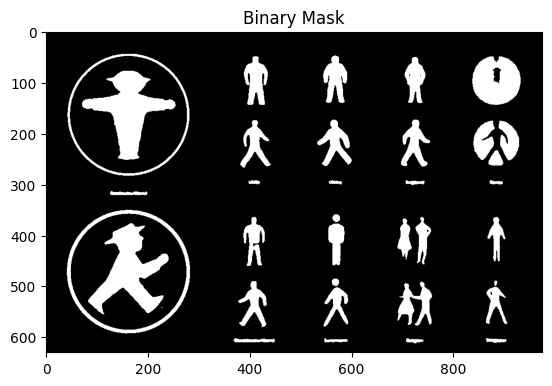

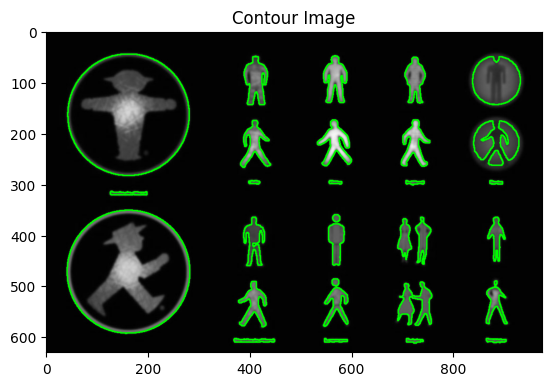

In [18]:
# Derive a binary mask (data type logical) of the image, where “1” represents the object of interest and “0” represents background (graythresh and im2bw).
normalized_test1B_image_8bit = (normalized_test1B_image * 255).astype(np.uint8)
threshold_value_test1B, binary_mask_test1B = cv.threshold(normalized_test1B_image_8bit, 0, 1, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary_mask_test1B = binary_mask_test1B.astype(bool)

plt.imshow(binary_mask_test1B, cmap='gray')
plt.title('Binary Mask')
plt.show()

#applying c
# as bwboundaries in Matlab in python after my research over Internet I found that cv2.findContours() is the equivalent function in python.
test1B_contours = cv.findContours(binary_mask_test1B.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
test1B_contours = test1B_contours[0] if len(test1B_contours) == 2 else test1B_contours[1]

# Draw the contours on the original image
contour_test1B_image = cv.drawContours(test1B_img.copy(), test1B_contours, -1, (0, 255, 0), 2)

plt.imshow(contour_test1B_image)
plt.title('Contour Image')
plt.show()

Reference: https://numpy.org/doc/stable/reference/routines.fft.html

https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python

In [19]:
boundary = test1B_contours[0]
boundary_points = boundary.squeeze()                        # Extract the boundary points from the contour
centroid = np.mean(boundary_points, axis=0)
centroid = centroid.astype(int)                             # Convert the centroid to integer coordinates
shifted_boundary_points = boundary_points - centroid        # Shift boundary points with respect to the centroid

n = 24
resample_points = []
boundary_length = cv.arcLength(boundary, True)              # Calculate the length of the boundary
step_size = boundary_length / n                             # Calculate the step size

for i in range(n):
    position = i * step_size
    index = int(position) if int(position) < boundary_points.shape[0] else boundary_points.shape[0] - 1
    resample_points.append(shifted_boundary_points[index])

resample_points = np.array(resample_points)

angle = np.arctan2(resample_points[0, 1], resample_points[0, 0])  # Calculate the angle of each point                                        
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])  # Create the rotation matrix
rotated_points = np.dot(rotation_matrix, resample_points.T).T    # Rotate the points

# Fourier-descriptor Df based on the binary mask
Df = fft(rotated_points[:, 0] + 1j * rotated_points[:, 1])                      #https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

fourier_descriptor    = Df[:n]
normalized_descriptor_test1B = fourier_descriptor / np.abs(fourier_descriptor[0])

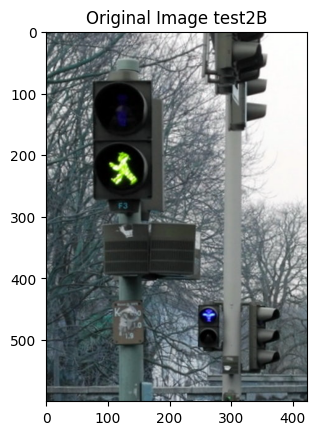

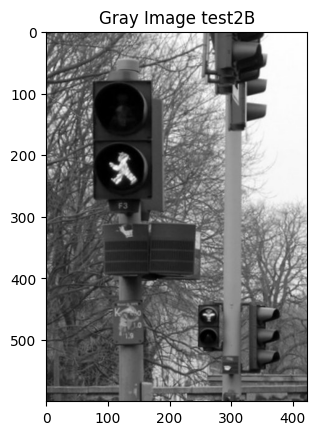

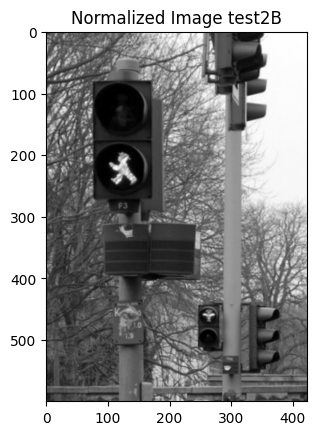

In [20]:
#for image test2B.jpg
#apply a) the same steps as for trainB.png, and b) the same steps as for trainB.png, but with n = 24
#Read the image trainB.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.
test2B_image = cv.imread("test2B.jpg")
plt.imshow(test2B_image)
plt.title('Original Image test2B')
plt.show()

# Load the image in grayscale
test2B_image = cv.imread("test2B.jpg", cv.IMREAD_GRAYSCALE)
test2B_image = cv.cvtColor(test2B_image, cv.COLOR_BGR2RGB)
plt.imshow(test2B_image, cmap="gray")
plt.title('Gray Image test2B')
cv.imwrite('Gray_test2B.png',test2B_image)
plt.show()

normalized_test2B_image = test2B_image.astype(np.float64) / 255.0

plt.imshow(normalized_test2B_image, cmap='gray', vmin=0, vmax=1)
plt.title('Normalized Image test2B')
plt.show()

In [21]:
# Derive a binary mask (data type logical) of the image, where “1” represents the object of interest and “0” represents background (graythresh and im2bw).
normalized_test2B_image_8bit = (normalized_test2B_image * 255).astype(np.uint8)
threshold_value_test2B, binary_mask_test2B = cv.threshold(normalized_test2B_image, 0, 1, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary_mask_test2B = binary_mask_test2B.astype(bool)

plt.imshow(binary_mask_test2B, cmap='gray')
plt.title('Binary Mask')
plt.show()

#applying c
# as bwboundaries in Matlab in python after my research over Internet I found that cv2.findContours() is the equivalent function in python.
test2B_contours = cv.findContours(binary_mask_test2B.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
test2B_contours = test2B_contours[0] if len(test2B_contours) == 2 else test2B_contours[1]

# Draw the contours on the original image
contour_test2B_image = cv.drawContours(test2B_image.copy(), test2B_contours, -1, (0, 255, 0), 2)
plt.imshow(contour_test2B_image)
plt.title('Contour Image')
plt.show()

boundary = test2B_contours[0]
boundary_points = boundary.squeeze()                        
centroid = np.mean(boundary_points, axis=0)
centroid = centroid.astype(int)                             
shifted_boundary_points = boundary_points - centroid        

n = 24
resample_points = []
boundary_length = cv.arcLength(boundary, True)              
step_size = boundary_length / n                             

for i in range(n):
    position = i * step_size
    index = int(position) if int(position) < boundary_points.shape[0] else boundary_points.shape[0] - 1
    resample_points.append(shifted_boundary_points[index])

resample_points = np.array(resample_points)

angle = np.arctan2(resample_points[0, 1], resample_points[0, 0])                                        
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])  
rotated_points = np.dot(rotation_matrix, resample_points.T).T    

# Fourier-descriptor Df based on the binary mask
Df = fft(rotated_points[:, 0] + 1j * rotated_points[:, 1])                      #https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
fourier_descriptor = Df[:n]
normalized_descriptor_test2B = fourier_descriptor / np.abs(fourier_descriptor[0])


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 22 (CV_64FC3)


Challenegs: 
1. I tried to mark only the shape of the man walking in the signal but due to contour applied to image it tries to find the shapes present in the complete image.
2. I tried to implement the Df as of the train image and test1B image on the test2B I was struggling with the error. Which I was very struck to solve and couldn't identify why I do get this error and couldn't debug.
3. I was sure that Fourier-descriptor Df was based on the binary mak image, here if I do change it to Gray scale image the occurance of the result was quite and could not notice the reason why


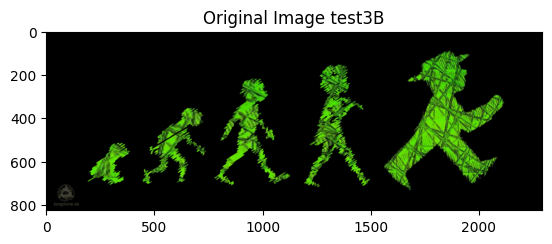

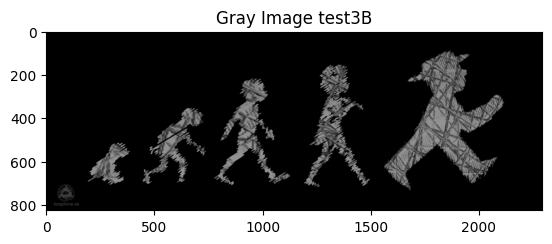

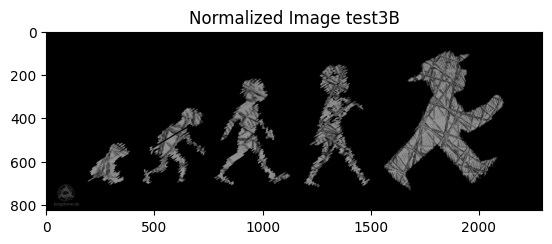

In [ ]:
#for image test3B.jpg
#apply a) the same steps as for trainB.png, and b) the same steps as for trainB.png, but with n = 24
#Read the image trainB.png, convert it to a grayscale image, and normalize it to range [0.0, 1.0]. Use double values.
test3B_image = cv.imread("test3B.jpg")
plt.imshow(test3B_image)
plt.title('Original Image test3B')
plt.show()

# Load the image in grayscale
test3B_image = cv.imread("test3B.jpg", cv.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python) given
test3B_image = cv.cvtColor(test3B_image, cv.COLOR_BGR2RGB)
plt.imshow(test3B_image, cmap="gray")
plt.title('Gray Image test3B')
cv.imwrite('Gray_test3B.png',test3B_image)
plt.show()

normalized_test3B_image = test3B_image.astype(np.float64) / 255.0

plt.imshow(normalized_test3B_image, cmap='gray', vmin=0, vmax=1)
plt.title('Normalized Image test3B')
plt.show()

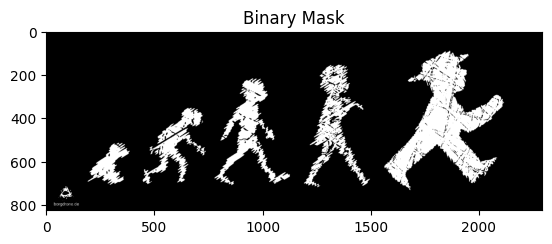

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


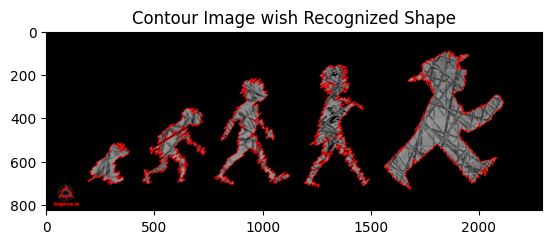

In [ ]:
#applying c

# Derive a binary mask (data type logical) of the image, where “1” represents the object of interest and “0” represents background (graythresh and im2bw).
# Convert the RGB image to grayscale (here the threshold function takes a single-channel grayscale imaeg as input)
grayscale_test3B_image = cv.cvtColor(test3B_image, cv.COLOR_RGB2GRAY)
threshold_value, binary_mask_test3B = cv.threshold(grayscale_test3B_image, 0, 1, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary_mask_test3B = binary_mask_test3B.astype(bool)
plt.imshow(binary_mask_test3B, cmap='gray')
plt.title('Binary Mask')
plt.show()

# as bwboundaries in Matlab in python after my research over Internet I found that cv2.findContours() is the equivalent function in python.
test3B_contours = cv.findContours(binary_mask_test3B.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
test3B_contours = test3B_contours[0] if len(test3B_contours) == 2 else test3B_contours[1]

# Draw the contours on the original image
contour_test3B_image = cv.drawContours(normalized_test3B_image.copy(), test3B_contours, -1, (255, 0, 0), 2)

plt.imshow(contour_test3B_image)
plt.title('Contour Image wish Recognized Shape')
plt.show()

In [ ]:
# Extract the boundary points from the contour
boundary_points = test3B_contours[0].squeeze()

# Calculate the centroid of the boundary
centroid = np.mean(boundary_points, axis=0)
centroid = centroid.astype(int)
shifted_boundary_points = boundary_points - centroid

n = 24  # Number of elements for the descriptor
boundary_length = cv.arcLength(test3B_contours[0], True)  # Calculate the length of the boundary
step_size = boundary_length / n  
resample_points = []
for i in range(n):
    position = i * step_size
    index = int(position) if int(position) < boundary_points.shape[0] else boundary_points.shape[0] - 1
    resample_points.append(shifted_boundary_points[index])

resample_points = np.array(resample_points)
angle = np.arctan2(resample_points[:, 1], resample_points[:, 0])

rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotated_points = np.dot(resample_points, rotation_matrix.T)

# Fourier-descriptor Df based on the binary mask
Df = np.fft.fft(rotated_points[:, 0] + 1j * rotated_points[:, 1])
fourier_descriptor = Df[:n]
descriptor_0 = np.abs(fourier_descriptor[0])
normalized_descriptor_test3B = np.divide(fourier_descriptor, descriptor_0, out=np.zeros_like(fourier_descriptor), where=(descriptor_0 != 0))
normalized_descriptor_test3B[np.isnan(normalized_descriptor_test3B)] = 0.0


e) Identify the object by comparing the trained Fourier-descriptor from step c) with all identified descriptors of the test images from step d). Use the Euclidean distance of the Fourier-descriptors for identification, e.g.

                                ||Df,train − Df,test|| < 0.09.

In [ ]:
# Calculate the Euclidean distance between the Fourier-descriptors
distance1 = np.linalg.norm(normalized_descriptor_trainB - normalized_descriptor_test1B)
distance2 = np.linalg.norm(normalized_descriptor_trainB - normalized_descriptor_test2B)
# distance3 = np.linalg.norm(normalized_descriptor_trainB - normalized_descriptor_test3B)
# print("The distance between the trainB and test1B images is: ", distance1)
# print("The distance between the trainB and test2B images is: ", distance2)
# print("The distance between the trainB and test3B images is: ", distance3)

threshold = 0.09

f) For qualitative validation of the results, plot the identified boundaries on the mask computed in step b) (imshow, hold on, plot).

The test1B image is not similar to the trainB image
The test2B image is not similar to the trainB image


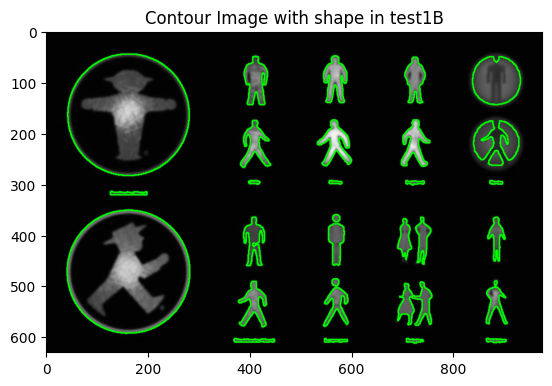

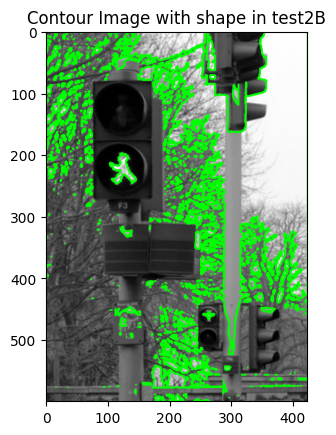

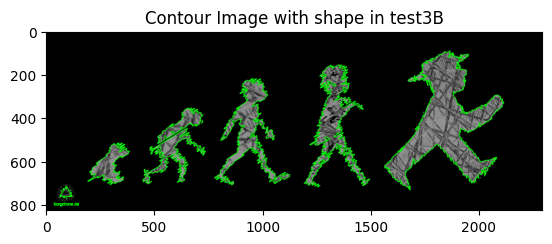

In [ ]:
contour_test1B_image = cv.drawContours(test1B_img.copy(), test1B_contours, -1, (0, 255, 0), 2)
contour_test2B_image = cv.drawContours(test2B_image.copy(), test2B_contours, -1, (0, 255, 0), 2)
contour_test3B_image = cv.drawContours(test3B_image.copy(), test3B_contours, -1, (0, 255, 0), 2)

    
if distance1 < threshold:
    print("The test1B image is similar to the trainB image")
else:
    print("The test1B image is not similar to the trainB image")

if distance2 < threshold:
    print("The test2B image is similar to the trainB image")
else:
    print("The test2B image is not similar to the trainB image")

# if distance3 < threshold:
#     print("The test3B image is similar to the trainB image")
#     cv.putText(contour_test3B_image, 'Similar', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
# else:
#     print("The test3B image is not similar to the trainB image")
#     cv.putText(contour_test3B_image, 'Not Similar', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(contour_test1B_image)
plt.title('Contour Image with shape in test1B')
plt.show()

plt.imshow(contour_test2B_image)
plt.title('Contour Image with shape in test2B')
plt.show()

plt.imshow(contour_test3B_image)
plt.title('Contour Image with shape in test3B')
plt.show()

